<a href="https://colab.research.google.com/github/DanielGGuerra/-Despejo-irregular-de-lixo-no-meio-urbano/blob/master/An%C3%A1lise_e_previs%C3%A3o_de_n%C3%ADvel_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anáilise e previsão de estado cance

## Análise exploratória do dados

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
pacientes_df = pd.read_excel(
    '/content/cancer patient data sets.xlsx'
    )
pacientes_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [31]:
pacientes_df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [32]:
# Convetendo nivel para valores numerico
def converte_level(level):
  if(level == 'Low'):
    return 0
  elif(level == 'Medium'):
    return 1
  else:
    return 2

pacientes_df.Level = pacientes_df.Level.apply(converte_level)

In [33]:
pacientes_df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


In [42]:
# Removendo coluna de Id para não influência no treinamento do modelo
pacientes_df.drop(['Patient Id'], axis=1, inplace=True)

## Análise descritiva

In [87]:
pacientes_df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


Analisando o grafico abaixo observamos que a obsidade possue correlação forte com nivel do cance. Além disso, podemos nota uso de alcool, risco genêtica e tosse com sangue também possue correção alta.    

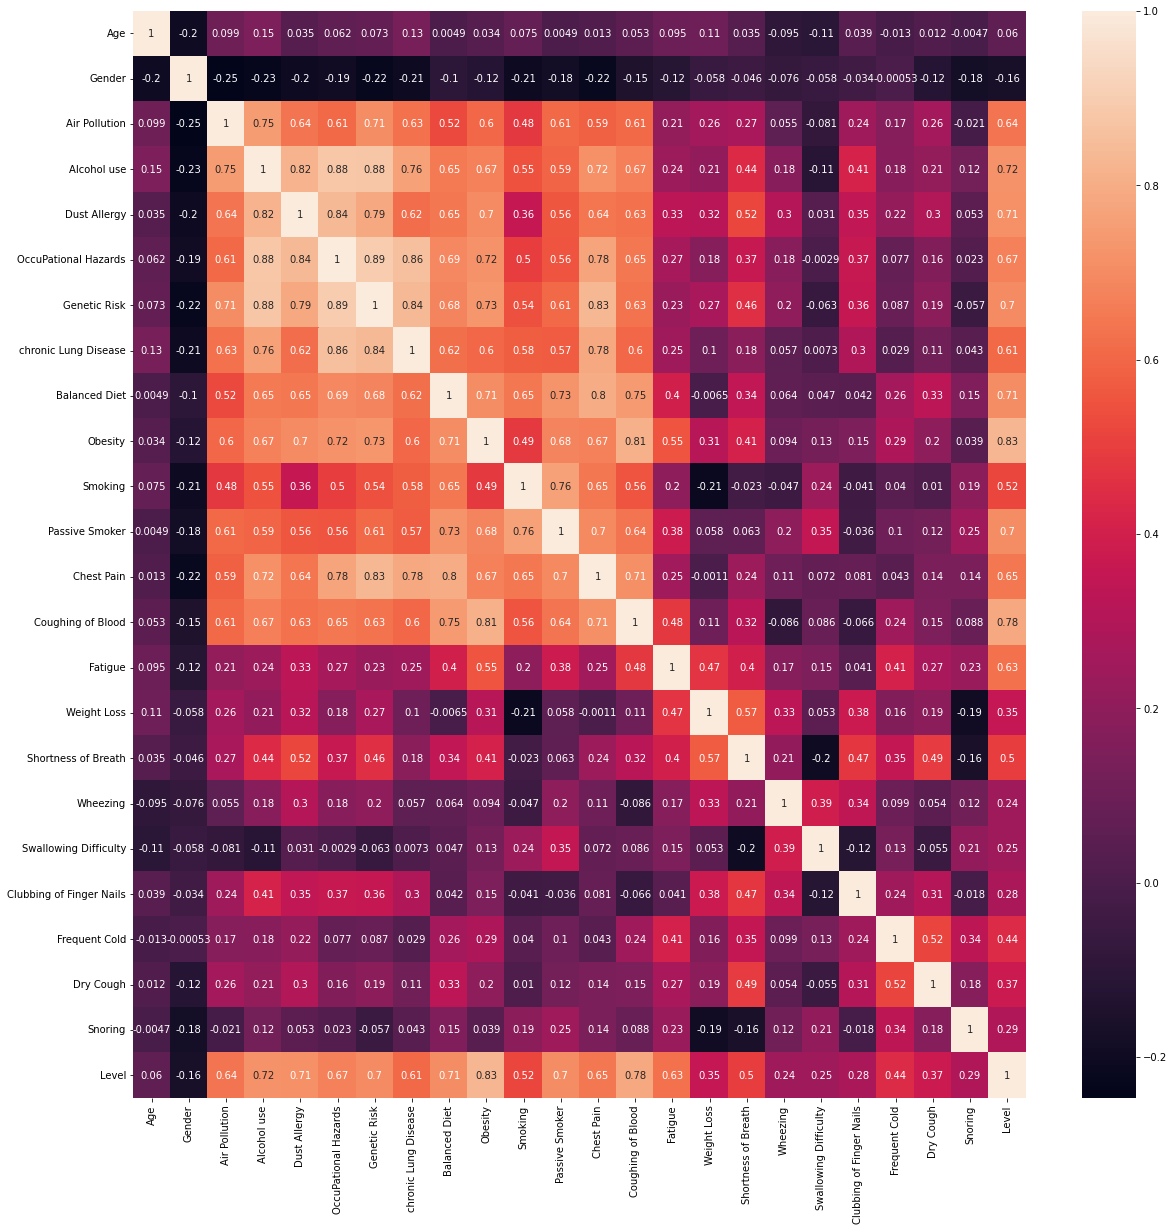

In [45]:
correlacao = pacientes_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True)

In [46]:
pacientes_df.columns 

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

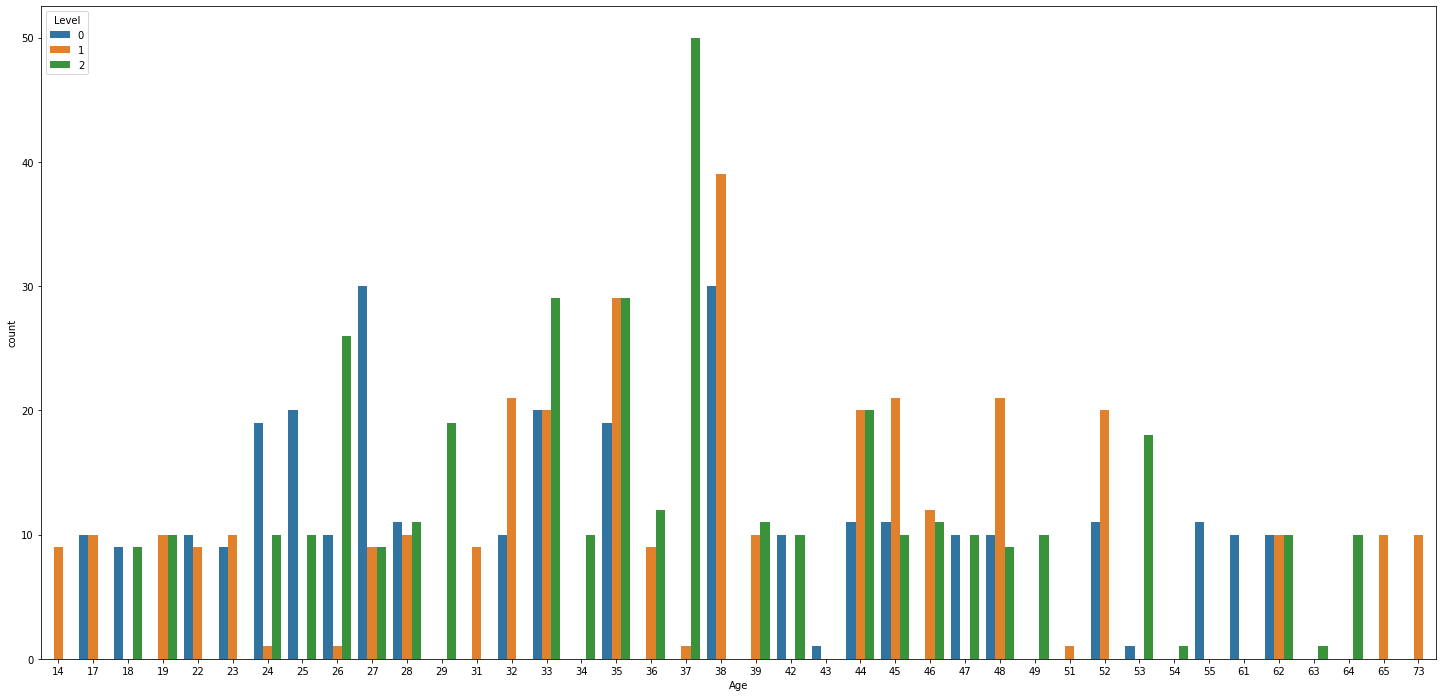

In [77]:
plt.figure(figsize=(25, 12))
sns.countplot(x = 'Age', hue='Level', data=pacientes_df)

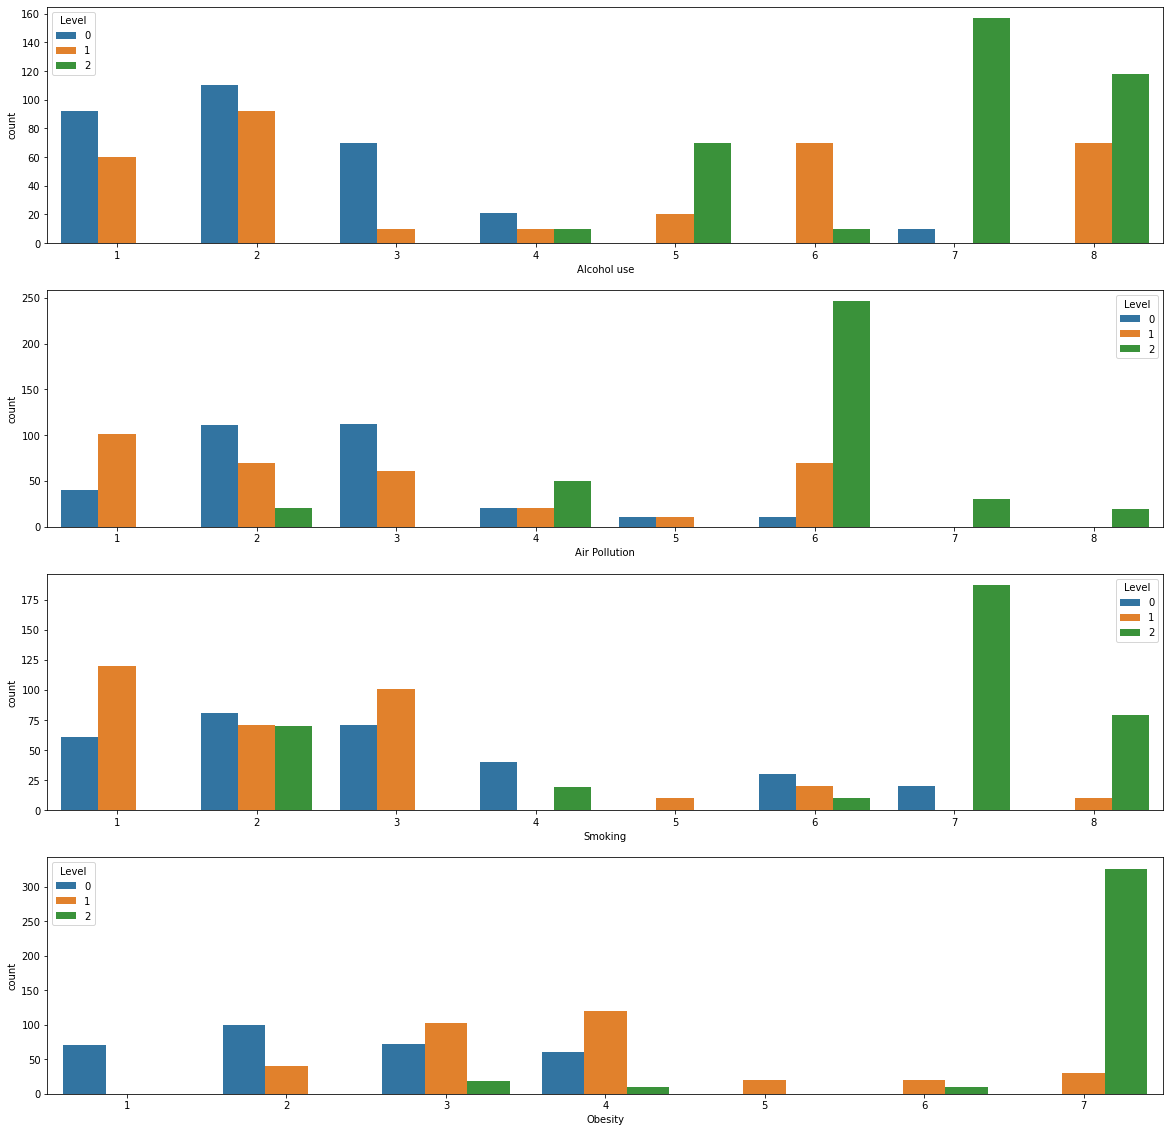

In [64]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Alcohol use', hue = 'Level', data=pacientes_df)
plt.subplot(412)
sns.countplot(x = 'Air Pollution', hue = 'Level', data=pacientes_df)
plt.subplot(413)
sns.countplot(x = 'Smoking', hue = 'Level', data=pacientes_df)
plt.subplot(414)
sns.countplot(x = 'Obesity', hue = 'Level', data=pacientes_df)

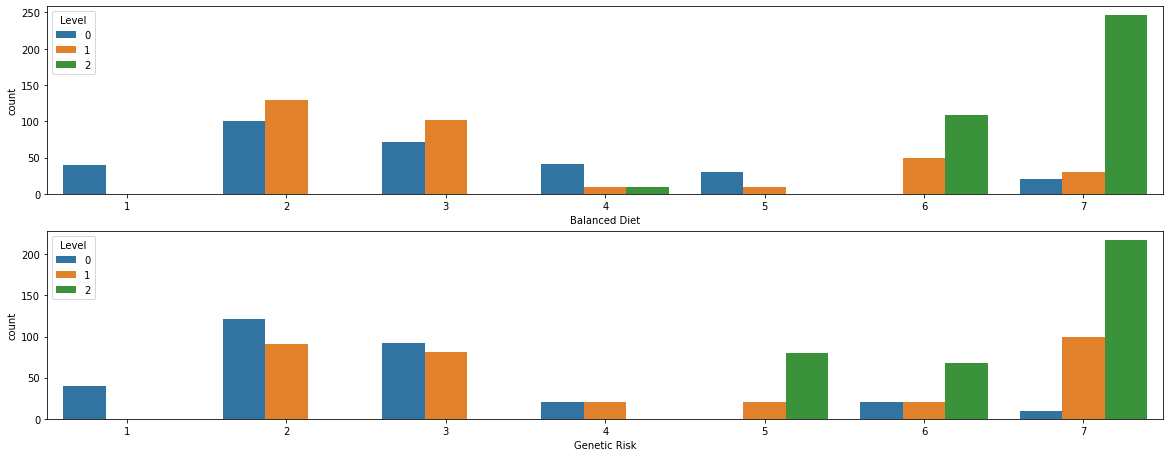

In [66]:
plt.figure(figsize=(20, 20))
plt.subplot(511)
sns.countplot(x = 'Balanced Diet', hue = 'Level', data=pacientes_df)
plt.subplot(512)
sns.countplot(x = 'Genetic Risk', hue = 'Level', data=pacientes_df)

In [79]:
low_level_df = pacientes_df[pacientes_df['Level'] == 0]
medium_level_df = pacientes_df[pacientes_df['Level'] == 1]
high_level_df = pacientes_df[pacientes_df['Level'] == 2]

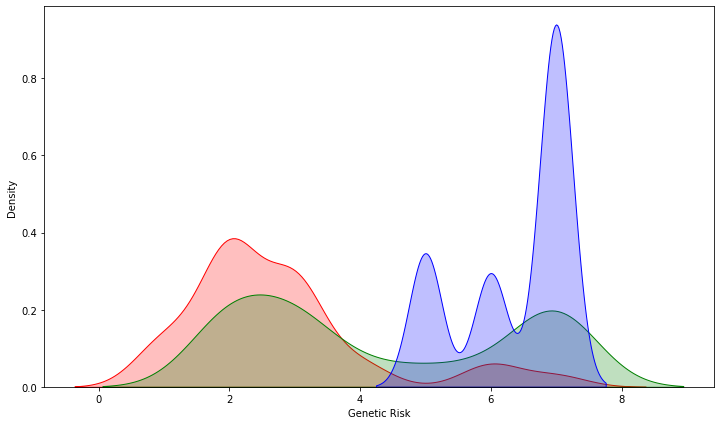

In [84]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(low_level_df['Genetic Risk'], label = 'Baixo', shade = True, color = 'r')
sns.kdeplot(medium_level_df['Genetic Risk'], label = 'Médio', shade = True, color = 'g')
sns.kdeplot(high_level_df['Genetic Risk'], label = 'Alto', shade = True, color = 'b')

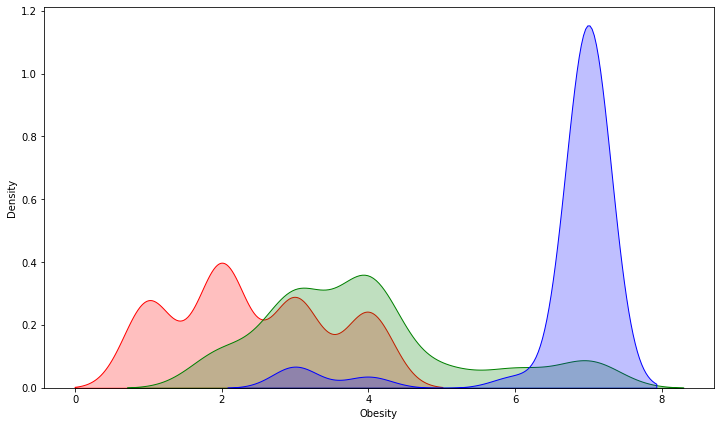

In [85]:
plt.figure(figsize=(12,7))
sns.kdeplot(low_level_df['Obesity'], label = 'Baixo', shade = True, color = 'r')
sns.kdeplot(medium_level_df['Obesity'], label = 'Médio', shade = True, color = 'g')
sns.kdeplot(high_level_df['Obesity'], label = 'Alto', shade = True, color = 'b')

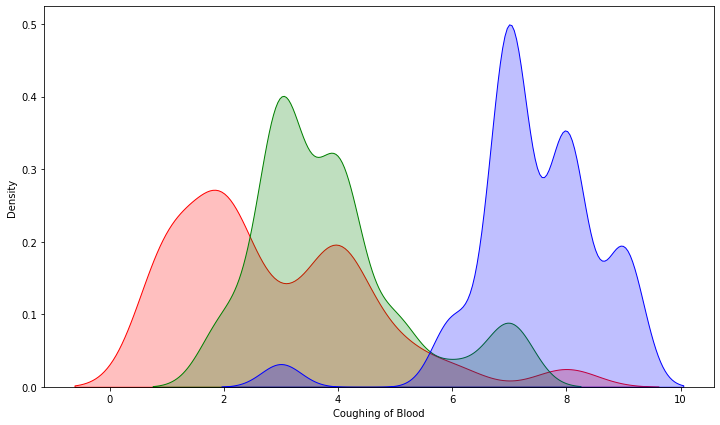

In [86]:
plt.figure(figsize=(12,7))
sns.kdeplot(low_level_df['Coughing of Blood'], label = 'Baixo', shade = True, color = 'r')
sns.kdeplot(medium_level_df['Coughing of Blood'], label = 'Médio', shade = True, color = 'g')
sns.kdeplot(high_level_df['Coughing of Blood'], label = 'Alto', shade = True, color = 'b')